In [1]:
from library_dicom.dicom_processor.tools.flip import *
from library_dicom.dicom_processor.tools.create_mip import *
#from radiomics.featureextractor import RadiomicsFeatureExtractor 
import os 
import SimpleITK as sitk 
from library_dicom.dicom_processor.tools.threshold_mask import * 

In [ ]:
#get tmtv 

In [2]:
csv_flip_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/FLIP_metrics_v2.csv'

with open(csv_flip_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [3]:
csv_data[0]

['CR,014',
 '2017014',
 '1.2.250.1.38.2.1.102.140724093005.103468016',
 'cr_014_jul 25_2014.csv',
 'pet0',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_CT.nii',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_PT.nii',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_mask.nii',
 '20',
 '9.66',
 '90.1559396901572',
 '144.317313517697']

In [4]:
old = 'D:FLIP_NIFTI'
new = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI'

for serie in csv_data : 
    ct_path = '/'.join(serie[5].split('/')[-3:])
    pet_path = '/'.join(serie[6].split('/')[-3:])
    mask_path = '/'.join(serie[7].split('/')[-3:])

    new_ct_path = os.path.join(new, ct_path)
    new_pet_path = os.path.join(new, pet_path)
    new_mask_path = os.path.join(new, mask_path)

    serie[5] = new_ct_path
    serie[6] = new_pet_path 
    serie[7] = new_mask_path

In [5]:
csv_data[0]

['CR,014',
 '2017014',
 '1.2.250.1.38.2.1.102.140724093005.103468016',
 'cr_014_jul 25_2014.csv',
 'pet0',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_CT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_mask.nii',
 '20',
 '9.66',
 '90.1559396901572',
 '144.317313517697']

In [6]:
volume = []
for serie in csv_data : 
    print(csv_data.index(serie))
    img = sitk.ReadImage(serie[7])
    mask_array = sitk.GetArrayFromImage(img).transpose()

    pet_img = sitk.ReadImage(serie[6])

    spacing = pet_img.GetSpacing() 

    volume_voxel = spacing[0]*spacing[1]*spacing[2]* 10**(-3)

    pet_array = sitk.GetArrayFromImage(pet_img).transpose()
    mask_array = get_threshold_matrix_4D(mask_array , pet_array, 0.41)

    number_pixel = len(np.where(mask_array != 0)[0])

    volume.append(number_pixel * volume_voxel)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [7]:
volume

[392.49021344768613,
 126.33246117828094,
 61.54881573791499,
 142.492691889056,
 2210.5621395293565,
 1448.5192340437789,
 1329.342925701494,
 72.76369349696324,
 21.37599872589111,
 1257.792,
 1351.1680000000001,
 242.9470547671183,
 1567.759937194448,
 42.29926189103862,
 155.21340922135232,
 174.27295899107912,
 1121.6271338377876,
 1976.2215155493245,
 239.5631138158352,
 1148.682044636953,
 929.8146953791729,
 117.95585662664962,
 26.109448165807407,
 64.56726055330364,
 796.6246924937877,
 95.27152987266163,
 84.61395238919067,
 32.090624906122684,
 1489.8681474970363,
 825.8500830332923,
 15.902050734730437,
 140.29104015935445,
 603.968,
 793.344,
 192.12800000000001,
 646.464,
 1788.288,
 0.768,
 90.56,
 330.88,
 16.37230254370789,
 55.188095808425686,
 351.73080358336586,
 558.3004931241909,
 628.7163232133905,
 732.3246329276757,
 3.8815793264717793,
 662.7547880762969,
 226.37569687333493,
 20.751520245368358,
 700.2767215655241,
 43.34430247893487,
 125.60392589762527,
 1

In [8]:
nifti_directory = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI'

with open(os.path.join(nifti_directory, 'FLIP_metrics_v3.csv'), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["PATIENT_NAME", "PATIENT_ID", "STUDY_UID", "CSV_NAME", "PET", "NIFTI_CT" ,"NIFTI_PET", "NIFTI_MASK", "ROI", "SUV_MAX", "DIAM_2D", "DIAM_3D", "TMTV"])
    for serie in csv_data: 
        index = csv_data.index(serie)
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[6], serie[7], serie[8], serie[9], serie[10], serie[11], volume[index]])

In [22]:
#correlation plus grand diametre 3d  / tmtv
diametre = []
for serie in csv_data : 
    index = csv_data.index(serie)
    diametre.append(float(serie[-1]))

Text(0, 0.5, 'TMTV(ml)')

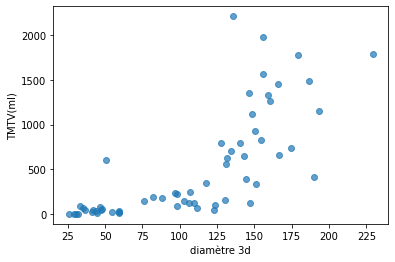

In [23]:
import matplotlib.pyplot as plt 

plt.scatter(diametre, volume, alpha=0.7)
plt.xlabel("diamètre 3d")
plt.ylabel("TMTV(ml)")


Text(0, 0.5, 'TMTV(ml)')

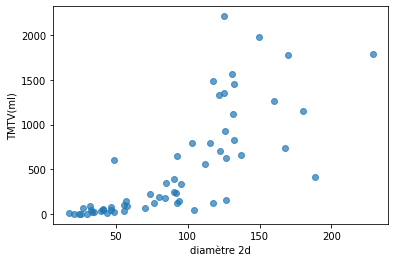

In [24]:
#correlation plus grand diametre 2d  / tmtv
diametre_2d = []
for serie in csv_data : 
    index = csv_data.index(serie)
    diametre_2d.append(float(serie[-2]))

plt.scatter(diametre_2d, volume, alpha=0.7)
plt.xlabel("diamètre 2d")
plt.ylabel("TMTV(ml)")


In [ ]:
#get bigger diameter 

In [2]:
csv_flip_path = r'D:\FLIP_NIFTI\FLIP_metrics.csv'

with open(csv_flip_path, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [3]:
csv_data[0]

['CR,014',
 '2017014',
 '1.2.250.1.38.2.1.102.140724093005.103468016',
 'cr_014_jul 25_2014.csv',
 'pet0',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_CT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_mask.nii',
 '20',
 '9.66']

In [4]:
#good path 
for row in csv_data : 
    ct_path = row[5]
    pt_path = row[6]
    mask_path = row[7]

    new_ct_path =  os.path.join( r'D:', '/'.join(ct_path.split('/')[-4:]))
    new_pt_path =  os.path.join( r'D:', '/'.join(pt_path.split('/')[-4:]))
    new_mask_path =  os.path.join( r'D:', '/'.join(mask_path.split('/')[-4:]))

    row[5] = new_ct_path
    row[6] = new_pt_path
    row[7] = new_mask_path 



In [5]:
csv_data[0]

['CR,014',
 '2017014',
 '1.2.250.1.38.2.1.102.140724093005.103468016',
 'cr_014_jul 25_2014.csv',
 'pet0',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_CT.nii',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_PT.nii',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_mask.nii',
 '20',
 '9.66']

In [7]:
diam_2d = []
diam_3d = []
for row in csv_data : 
    print(csv_data.index(row))
    diameter_2d, diameter_3d = extract_features(row[7], row[6], int(row[8]))
    diam_2d.append(diameter_2d)
    diam_3d.append(diameter_3d)


0
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
1
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
2
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
3
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
4
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
5
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
6
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
7
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
8
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
9
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
10
GLCM is symmetrical, therefore Sum Av

In [8]:
len(csv_data)

60

In [13]:
csv_data[0]

['CR,014',
 '2017014',
 '1.2.250.1.38.2.1.102.140724093005.103468016',
 'cr_014_jul 25_2014.csv',
 'pet0',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_CT.nii',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_PT.nii',
 'D:FLIP_NIFTI/CR,014/pet0/1.2.250.1.38.2.1.102.140724093005.103468016_nifti_mask.nii',
 '20',
 '9.66']

In [9]:
len(diam_2d)

60

In [10]:
len(diam_3d)

60

In [14]:
nifti_directory = r'D:\FLIP_NIFTI'

with open(os.path.join(nifti_directory, 'FLIP_metrics_v2.csv'), 'w') as csv_file : 
    csv_writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(["PATIENT_NAME", "PATIENT_ID", "STUDY_UID", "CSV_NAME", "PET", "NIFTI_CT" ,"NIFTI_PET", "NIFTI_MASK", "ROI", "SUV_MAX", "DIAM_2D", "DIAM_3D"])
    for serie in csv_data: 
        index = csv_data.index(serie)
        csv_writer.writerow([serie[0], serie[1], serie[2], serie[3], serie[4], serie[5], serie[6], serie[7], serie[8], serie[9], diam_2d[index], diam_3d[index]])